In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime

In [4]:
df = pd.read_csv("Predict_ready_df")

In [71]:
df.columns

Index(['Unnamed: 0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'timestamp',
       'station_id', 'bike_id', 'idle_time', 'bike_count', 'temperature',
       'windspeed', 'rain', 'hour', 'IsWeekday', 'month', 'near_bus_station',
       'near_school', 'near_leisure_spots', 'date', 'IsHoliday', 'season',
       'bike_freq'],
      dtype='object')

/var/folders/nf/2xng7w014d1f2mbbxqsxbwg40000gn/T/ipykernel_25485/3893194726.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = used.corr()


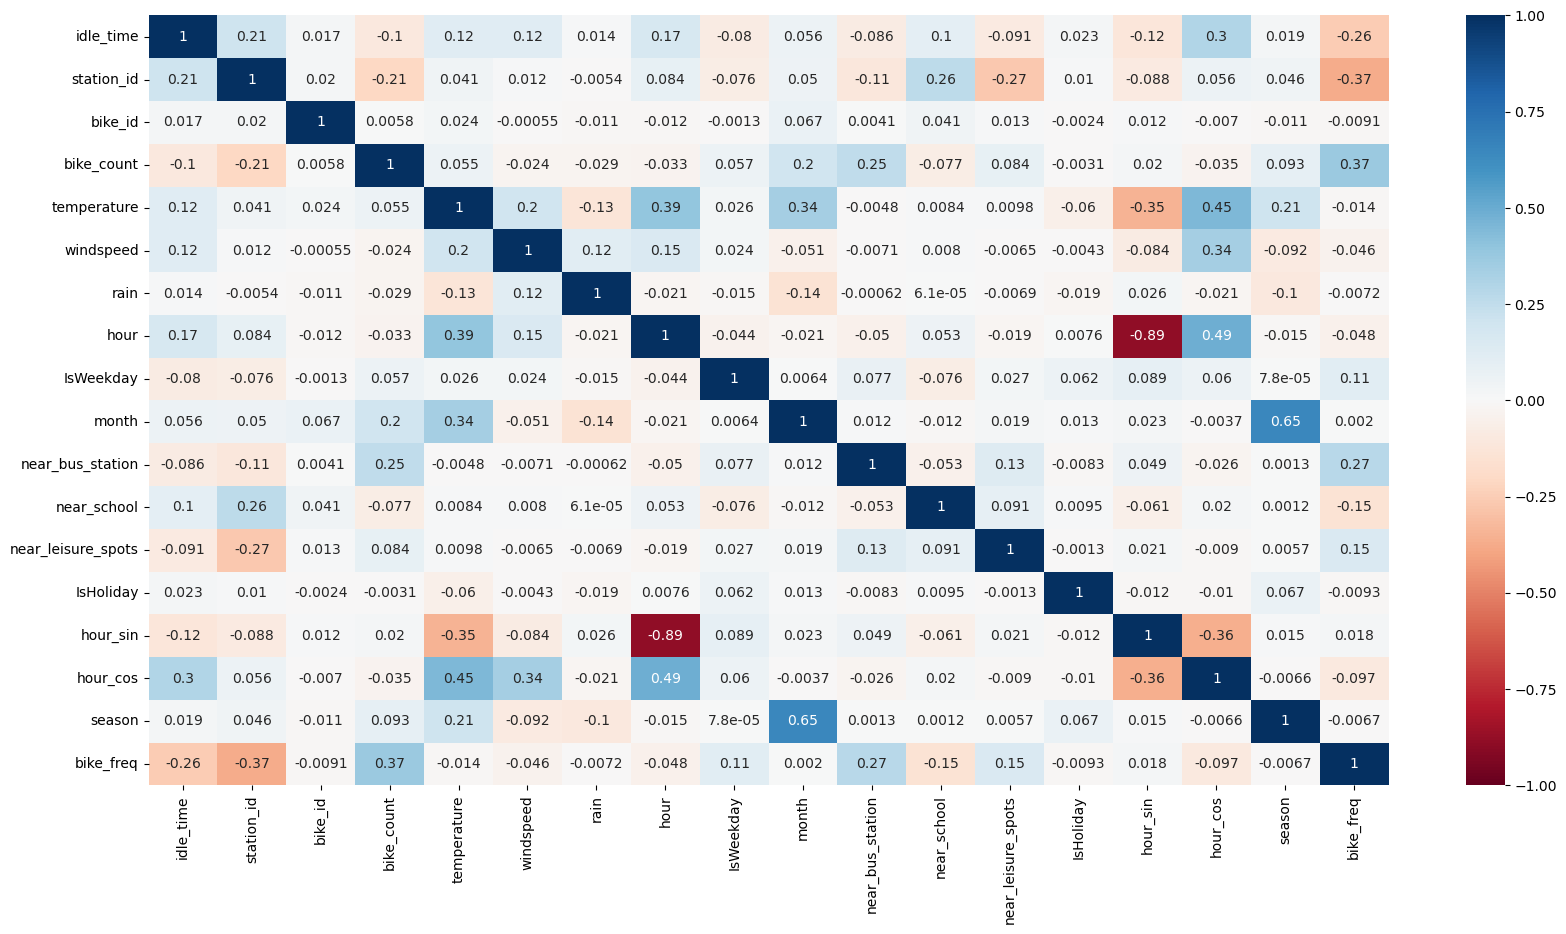

In [109]:
features =['idle_time','timestamp','station_id',
           'bike_id','bike_count','temperature','windspeed','rain','hour',
           'IsWeekday','month','near_bus_station','near_school',
           'near_leisure_spots','date','IsHoliday','hour_sin','hour_cos','season','bike_freq'
       ]

used = df[features]
plt.figure(figsize=(20, 10))
corr = used.corr()
# Create the heatmap
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

In [110]:
#random forest features 
xp = df[['bike_freq','bike_count', 'station_id', 'temperature', 'hour','near_leisure_spots' 'near_bus_station', 'near_school','IsHoliday', 'rain', 'IsWeekday', 
       
       ]].values

yp= df['idle_time'].values

In [5]:
#linear regression features 
xr = df[['bike_freq','bike_count', 'temperature', 'hour_sin','hour_cos', 'near_leisure_spots', 'near_bus_station', 'near_school','IsHoliday', 'rain', 'IsWeekday', 
       
       ]].values

yr = df['idle_time'].values

In [114]:
X_train_val, X_test, y_train_val, y_test = train_test_split(xp, yp, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765)

In [6]:
X_train_val2, X_test2, y_train_val2, y_test2 = train_test_split(xr, yr, test_size=0.15)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train_val2, y_train_val2, test_size=0.1765)

# Scaling features

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaling for polynomial regression 
X_train2[:,:5] = scaler.fit_transform(X_train2[:,:5])
X_val2[:,:5] = scaler.transform(X_val2[:,:5])
X_test2[:,:5] = scaler.transform(X_test2[:,:5])

In [ ]:
X_test

# Polynomial transformation

In [9]:
from sklearn.preprocessing import PolynomialFeatures
degree = 3
poly = PolynomialFeatures(degree= degree,include_bias= False)

In [116]:
# we perform polynomial transformation only on the first 4 features and then concat them with the rest.
poly_fts_train = poly.fit_transform(X_train[:,:5])
non_poly_train = X_train[:,5:]
poly_train = np.concatenate((poly_fts_train,non_poly_train),axis =1)

poly_fts_test = poly.fit_transform(X_test[:,:5])
non_poly_test = X_test[:,5:]
poly_test = np.concatenate((poly_fts_test,non_poly_test),axis =1)

poly_fts_val = poly.fit_transform(X_val[:,:5])
non_poly_val = X_val[:,5:]
poly_val = np.concatenate((poly_fts_val,non_poly_val),axis =1)


In [10]:
poly_fts_train2 = poly.fit_transform(X_train2[:,:5])
non_poly_train2 = X_train2[:,5:]
poly_train2 = np.concatenate((poly_fts_train2,non_poly_train2),axis =1)

poly_fts_test2 = poly.fit_transform(X_test2[:,:5])
non_poly_test2 = X_test2[:,5:]
poly_test2 = np.concatenate((poly_fts_test2,non_poly_test2),axis =1)

poly_fts_val2 = poly.fit_transform(X_val2[:,:5])
non_poly_val2 = X_val2[:,5:]
poly_val2 = np.concatenate((poly_fts_val2,non_poly_val2),axis =1)


In [117]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15)
rf.fit(poly_train, y_train)

RandomForestRegressor(n_estimators=15)

In [118]:
y_pred = rf.predict(poly_val)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print("Mean absolute Error:", mae)
print(r2)
#we want to increase the r2 score so we try the rf with higher number of estimators (see below)

Mean absolute Error: 0.9545918226464145
0.45670391487367734


In [104]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=20)
rf.fit(poly_train, y_train)

RandomForestRegressor(n_estimators=20)

In [119]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=30)
rf.fit(poly_train, y_train)

RandomForestRegressor(n_estimators=30)

In [120]:
y_pred = rf.predict(poly_val)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print("Mean absolute Error:", mae)
print(r2)

Mean absolute Error: 0.9405130412234439
0.47393965765576196


In [100]:
y_pred = rf.predict(poly_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred )
print("Mean absolute Error:", mae)
print(r2)

Mean absolute Error: 56.358267179094035
0.4763112408243928


In [85]:
#We want to try grid search to find the best hyperparameters but unfortunately do not have the capacity. 
#We strongly believe that hyperparameters from grid search can increase r2 score. 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [18, 20, 25],
    'max_depth': [None, 5, 10]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(poly_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_model)
print(best_params)

KeyboardInterrupt: 

In [10]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(X_train, y_train)


DummyRegressor()

# Polynomial regression

In [148]:
# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_train2, y_train2)
print(regression_model.coef_ ,regression_model.intercept_)
regression_model.coef_
regression_model.intercept_


[ 1.11311366e+00  4.02036258e-04 -1.82157270e-01 -8.23628106e-01
  2.00427719e+00  5.77010878e-04  1.04855802e-06  1.98484631e-05
 -3.23726986e-03 -1.08700791e-01 -2.89631264e-08 -5.05917565e-05
 -1.14929350e-04  1.60560923e-04  1.64320954e-02  6.59563838e-02
 -1.25024478e-01 -5.40966187e-01 -9.66168498e-01  5.40966187e-01
 -9.37562300e-07 -3.72177084e-09  1.24133699e-06  1.71671506e-05
  2.73525103e-04 -3.29233307e-11  1.28890159e-08  1.91401793e-07
  5.12800963e-07 -6.65117924e-06 -1.69081035e-04  4.28320886e-05
 -1.21032243e+00 -1.50012286e-02 -1.27431402e+00 -1.55764290e-13
  1.80089599e-09  8.80281786e-09 -2.80502224e-09  7.65796100e-07
 -1.63079602e-07 -9.74597960e-06  2.19870125e-04 -6.59533995e-05
  1.82144162e-04 -3.04347386e-04 -1.51870863e-03  3.66547916e-03
 -8.89228829e-02  1.21015345e-02 -9.32343581e-02 -4.91999812e-01
  9.01586827e-01 -3.31628299e-01  1.10269037e+00 -3.00201750e-01
 -3.71912134e-02  2.37488528e-01  5.42233084e-01  2.43057611e-01
 -3.53705827e-01] 5.27383

5.273831441052132

In [149]:
test_pred = regression_model.predict(poly_test2)

print("Test set performance:")
print("MAE:",mean_absolute_error(y_test2, test_pred))
print("R2:",r2_score(y_test2,test_pred))

Test set performance:
MAE: 1.4063701318492736
R2: 0.2476343897864416


# Regularization Regression (Ridge)

In [11]:
from sklearn.linear_model import Ridge

# initialize model
model_L2 = Ridge(alpha = 0.01, solver = 'lsqr') # select least squares regression as solver

# train model
model_L2.fit(poly_train2, y_train2)
print("Coefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )

Coefficients  [-1.72306114e+01  1.82840579e+00 -2.18728675e+00 -5.14121002e-01
  3.79691651e+00  5.99926137e+01  5.71242161e+00 -2.89013129e+00
 -1.90481131e+01 -9.84710000e+00 -3.43193000e+00 -3.84646654e+00
 -1.46669851e+00  3.10536617e+00  5.02417978e+00  1.59543557e+00
 -1.24163813e+00  2.07145192e+00 -2.21993991e+00  1.21134359e+00
 -6.14139142e+01 -1.56802772e+01  2.19213061e+01 -1.67851037e+00
  4.43866582e+01 -5.94857860e+00  3.41379285e+00  8.04238801e+00
  7.85562961e+00  6.41184715e-01 -1.11211131e+01 -1.00682604e+01
  2.38939833e+01  1.73815332e+00 -4.84815436e+01  9.61418407e-01
  4.40056826e+00  1.37125872e+00  4.05846019e-01 -7.15030258e-01
 -3.85094776e+00 -2.40657460e+00  1.78959133e+00 -4.77362700e+00
 -6.08025117e-01 -3.22143602e+00 -8.67733503e-01  1.46373005e+00
  1.19458931e+00 -1.27466307e+00 -2.93970179e-01 -1.87283362e+00
 -2.33300009e+00  1.85287588e+00  3.75174646e-01 -2.91284478e-01
 -3.64377109e-02  2.25647251e-01  5.50463714e-01  2.40474455e-01
 -3.4567597

In [12]:
test_pred = model_L2.predict(poly_test2)

print("Test set performance:")
print("MAE:",mean_absolute_error(y_test2, test_pred))
print("R2:",r2_score(y_test2,test_pred))

Test set performance:
MAE: 1.4150059645863624
R2: 0.24701182264161714


# Regularization Regression (Lasso)

In [13]:
from sklearn.linear_model import Lasso

model_L1 = Lasso(alpha = 0.00001)

model_L1.fit(poly_train2, y_train2)

print("Coefficients ", model_L1.coef_, "\nIntercept ", model_L1.intercept_ )

Coefficients  [-1.75445483e+01  2.59834973e+00 -1.01321234e+00 -3.03371526e-01
  3.66408681e+00  4.38223811e+01  2.24595233e+00 -9.23121793e+00
 -9.40453858e+00  4.11145982e+00 -5.72565724e+00 -5.24402980e+00
  8.71617847e-02  6.16955737e+00  3.88457038e+00  1.44590477e+00
 -3.29578976e+00  9.46044092e-01 -3.39419299e+00  1.89636172e+00
 -5.80140165e+01 -7.70580170e+00  8.51275645e+00  5.85548311e+00
  8.81717240e+01 -2.15902687e+00  1.69815011e+00  1.51455699e+00
  4.34200516e+00  5.58392722e+00 -7.05090839e-01  6.38835404e+00
  1.58717624e+01 -2.03804186e+01 -7.96978165e+01 -9.19003049e-02
  9.20557565e+00  3.50348220e+00 -0.00000000e+00  3.10795267e-01
 -3.54458795e+00 -5.62226778e+00 -0.00000000e+00 -3.53861750e+00
 -2.82350565e+00 -3.79615496e+00 -4.16872104e-01  3.76944432e+00
 -3.76536231e-01  3.46834020e-01 -6.16107338e-01 -4.93671634e-01
 -1.10033231e+00  1.22119008e+00  8.36124882e-01 -2.95824739e-01
 -3.70672290e-02  2.32512655e-01  5.56322331e-01  2.40793579e-01
 -3.4682076

/Users/phuongkhanh/anaconda3/envs/dsml_proj/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.351e+06, tolerance: 1.325e+03
  model = cd_fast.enet_coordinate_descent(


In [14]:
test_pred = model_L1.predict(poly_test2)

print("Test set performance:")
print("MAE:",mean_absolute_error(y_test2, test_pred))
print("R2:",r2_score(y_test2,test_pred))

Test set performance:
MAE: 1.4089531852863368
R2: 0.24851824388340593


## GLM regression (Log link function)

In [15]:
from sklearn.linear_model import PoissonRegressor
pr = PoissonRegressor(alpha=0.1)
pr.fit(X_train2, y_train2)
print("Coefficients ", pr.coef_, "\nIntercept ", pr.intercept_ )

Coefficients  [-0.57350875 -0.1941542   0.14057241 -0.2316332   1.00637025 -0.28973413
 -0.25924178  0.3125259   0.08383682  0.06148253 -0.2453935 ] 
Intercept  0.4839774766482266


In [85]:
poly_val.shape

(4156794, 3)

In [34]:
def plot_poisson_regression_performance ():

    err_train = []
    err_cv = []
    
    for alpha in np.logspace(-20,-10,20):
        # fit model
        pr = PoissonRegressor(alpha= alpha) # select least squares regression as solver
        pr.fit(X_train2, y_train2)
    
        # compute errors
        err_train.append(mean_squared_error(pr.predict(X_train2), y_train2))
        err_cv.append(mean_squared_error(pr.predict(X_val2), y_val2))


    plt.figure(figsize = (8,6))
    plt.loglog(np.logspace(-20,-10,20), err_train, np.logspace(-20,-10,20), err_cv)
    plt.legend(["Training", "Validation"])
    plt.xlabel("$\lambda$ (or alpha in scikit learn terms)")
    plt.ylabel("Mean squared error")
    plt.show()

In [35]:
plot_poisson_regression_performance()

c:\Users\riven\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
c:\Users\riven\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
c:\Users\riven\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale 

KeyboardInterrupt: 

In [16]:
test_pred = pr.predict(X_test2)

print("Test set performance:")

print("MAE:",mean_absolute_error(y_test2, test_pred))
print("R2:",r2_score(y_test2,test_pred))

Test set performance:
MAE: 1.5386981703783076
R2: 0.11537114646103175


In [117]:
test_pred.max()

3.1349278390407562